In [ ]:
!pip install openpyxl

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import joblib
import os


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Number of principal components selected: 2

In [ ]:
# Initialize PCA
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(X)

In [ ]:
# Evaluate different numbers of clusters using Spectral Clustering
n_clusters_range = range(2, 5)
clustering_scores = []

for n_clusters in n_clusters_range:
    # Initialize and fit Spectral Clustering
    spectral = SpectralClustering(
        n_clusters=n_clusters,
        random_state=42,
        affinity='nearest_neighbors',
        n_neighbors=10 # Only needed if using 'nearest_neighbors' affinity n_neighbors=10
    ) 

    # Fit and get cluster labels
    cluster_labels = spectral.fit_predict(pca_result)

    # Calculate clustering metrics
    silhouette = silhouette_score(pca_result, cluster_labels)
    calinski = calinski_harabasz_score(pca_result, cluster_labels)
    davies = davies_bouldin_score(pca_result, cluster_labels)

    # Count points in each cluster
    cluster_sizes = np.bincount(cluster_labels)
    cluster_percentages = (cluster_sizes / len(cluster_labels)) * 100

    clustering_scores.append({
        'n_clusters': n_clusters,
        'silhouette': silhouette,
        'calinski': calinski,
        'davies': davies
    })

    print(f"Number of clusters: {n_clusters}")
    print("Percentage of points in each cluster:", end=" ")
    for j, percentage in enumerate(cluster_percentages):
        print(f"Cluster {j}: {percentage:.1f}%", end=" ")
    print()  # New line after percentages
    print(f"Silhouette Coefficient: {silhouette:.4f}",
          f"Calinski-Harabasz Index: {calinski:.4f}",
          f"Davies-Bouldin Index: {davies:.4f}")
    print("-" * 50)  # Add a separator line between iterations

Number of clusters: 2
Percentage of points in each cluster: Cluster 0: 47.6% Cluster 1: 52.4% 
Silhouette Coefficient: 0.5538 Calinski-Harabasz Index: 131428.9843 Davies-Bouldin Index: 0.6554
--------------------------------------------------
Number of clusters: 3
Percentage of points in each cluster: Cluster 0: 46.2% Cluster 1: 32.9% Cluster 2: 20.9% 
Silhouette Coefficient: 0.4794 Calinski-Harabasz Index: 112814.9579 Davies-Bouldin Index: 0.7430
--------------------------------------------------
Number of clusters: 4
Percentage of points in each cluster: Cluster 0: 31.8% Cluster 1: 31.6% Cluster 2: 20.9% Cluster 3: 15.8% 
Silhouette Coefficient: 0.4630 Calinski-Harabasz Index: 115550.0055 Davies-Bouldin Index: 0.8512
--------------------------------------------------


Number of clusters selected: 2

In [ ]:
# After selecting optimal number of clusters
n_clusters_optimal = 2
spectral_final = SpectralClustering(
    n_clusters=n_clusters_optimal,
    random_state=42,
    affinity='nearest_neighbors',
    n_neighbors=10
)

# Fit the final model
cluster_labels = spectral_final.fit_predict(pca_result)

In [ ]:
# Create DataFrame with results
df_segm_pca_spectral = pd.concat([
    X.reset_index(drop=True),
    pd.DataFrame(pca_result, columns=['Component 1', 'Component 2'])
], axis=1)

# Add cluster labels
df_segm_pca_spectral['Segment Spectral PCA'] = cluster_labels
df_segm_pca_spectral['Segment'] = df_segm_pca_spectral['Segment Spectral PCA'].map({
    0: 'first',
    1: 'second'
})

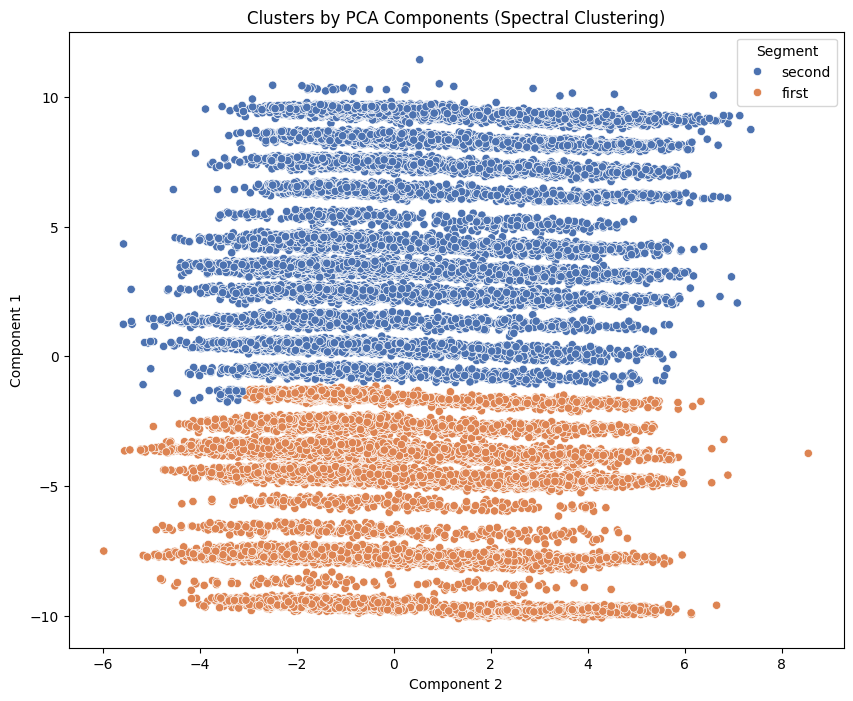

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_segm_pca_spectral,
    x='Component 2',
    y='Component 1',
    hue='Segment',
    palette="deep"
)
plt.title('Clusters by PCA Components (Spectral Clustering)')
plt.show()

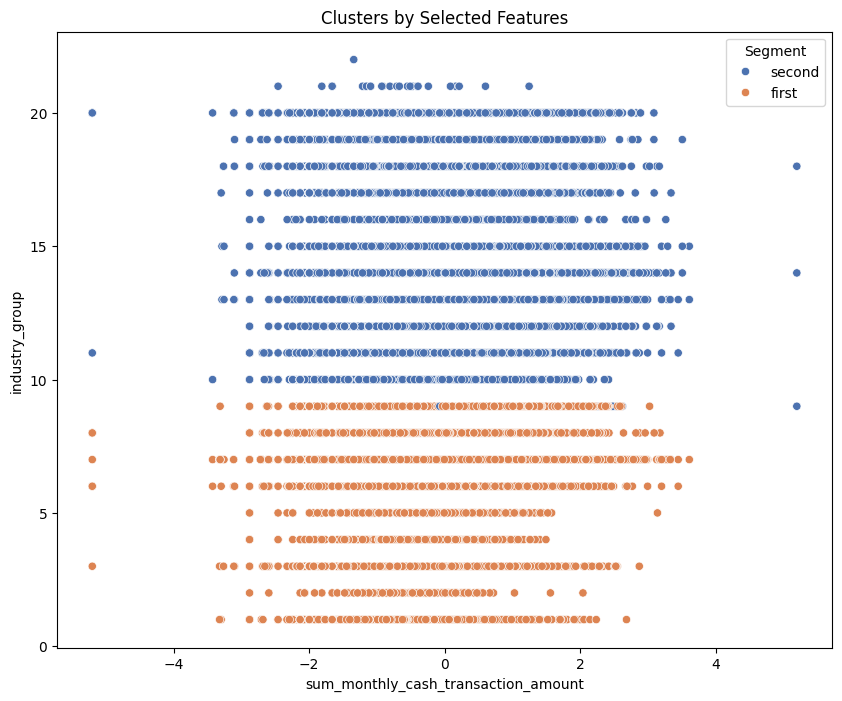

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_segm_pca_spectral,
    x='sum_monthly_cash_transaction_amount',
    y='industry_group',
    hue='Segment',
    palette="deep"
)
plt.title('Clusters by Selected Features')
plt.show()